In [1]:
from tkinter import Y

import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
loc = 'data/new/1304_2d/c5+.csv'

def show_image(image, title):
    # Show Image
    fig, ax = plt.subplots()
    ax.imshow(image, interpolation = 'nearest')
    ax.set_title(f'{title} image')
    fig.set_size_inches([2,2])

def csv_to_image(path):
    # Read in data
    with open(path, newline='\n') as c_file:
        reader = csv.reader(c_file, delimiter=',')
        reader.__next__()       # Skip column definitions

        pixels = [] 

        for row in reader:
            x, y, pixel = int(row[1]), int(row[2]), int(row[3])
            pixels.append((x, y, pixel))    # Store pixel as tuple

    # Get Bounds 
    x_min = min([pixel[0] for pixel in pixels])
    x_max = max([pixel[0] for pixel in pixels])
    y_min = min([pixel[1] for pixel in pixels])
    y_max = max([pixel[1] for pixel in pixels])

    # Generate Numpy Array
    image = np.empty([y_max-y_min+1, x_max-x_min+1])

    for pixel in pixels:
        image[pixel[1] - y_min, pixel[0] - x_min] = pixel[2]

    # Show Image
    show_image(image, path)

    return image



In [3]:
def norm_background(image, title, threshold = 0.75, hard = False):
    """
    Returns imaged normalized with respect to background
    """
    max_val = np.max(image)
    threshold = int(threshold * max_val)

    # Make Threshold image
    image_threshold = np.copy(image)
    image_threshold[image_threshold > threshold] = 255
    image_threshold[image_threshold <= threshold] = 0

    show_image(image_threshold, '')

    # Find Background Mean Value    
    bg_indices = np.where(image_threshold == 0)     # Fetch Indices
    avg_bg_value = np.average(image[bg_indices])

    # Normalize against background
    norm_image = (image - avg_bg_value).astype(int)
    norm_image = np.clip(norm_image, 0, 255)

    if hard:
        norm_image[bg_indices] = 0

    return norm_image


In [4]:
def integrate_image(image):
    cum_sum = np.sum(image)
    return cum_sum

TypeError: norm_background() missing 1 required positional argument: 'title'

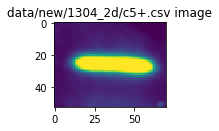

In [5]:
image = csv_to_image('data/new/1304_2d/c5+.csv')
image = norm_background(image)
show_image(image, '')

In [5]:
def integral_analysis(path_band, path_loading, threshold = 0.75, hard = False):
    # Pre-process
    band_image, load_image = csv_to_image(path_band), csv_to_image(path_loading)
    band_norm = norm_background(band_image, path_band, threshold, hard)
    show_image(band_norm, path_band)
    load_norm = norm_background(load_image, path_loading, threshold, hard)
    show_image(load_norm, path_loading)

    # Integrate
    int_band, int_load = integrate_image(band_norm), integrate_image(load_norm)

    # Enrichment
    norm_magnitude = int_band / int_load
    print(f'Magnitude (normalized): {norm_magnitude}')
    return norm_magnitude

Magnitude (normalized): 1.5026953302591415


1.5026953302591415

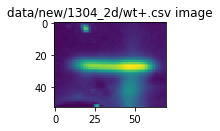

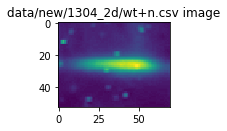

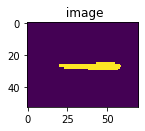

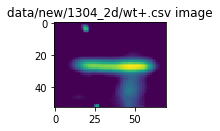

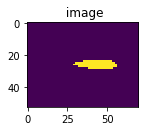

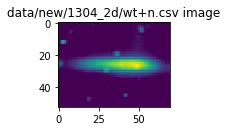

In [6]:
integral_analysis('data/new/1304_2d/wt+.csv', 'data/new/1304_2d/wt+n.csv', threshold = 0.75, hard = False)

In [7]:
def enrichment_analysis(rel_path, suffix, title, threshold = 0.75, hard = False):
    rp, sf, ex = rel_path, suffix, '.csv'
    p, pn = rp + '/' + sf + '+' + ex, rp + '/' + sf + '+n' + ex
    n, nn = rp + '/' + sf + '-' + ex, rp + '/' + sf + '-n' + ex

    pos_magnitude = integral_analysis(p, pn, threshold, hard)
    neg_magnitude = integral_analysis(n, nn, threshold, hard)

    enrichment = pos_magnitude / neg_magnitude

    print(f'Enrichment of {title}: {enrichment}')

Magnitude (normalized): 0.7102937913572351
Magnitude (normalized): 0.42240838543879883
Enrichment of c5: 1.681533359285423


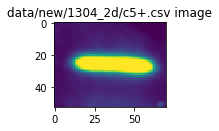

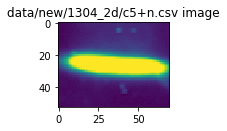

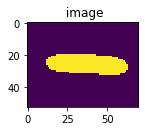

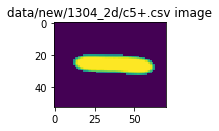

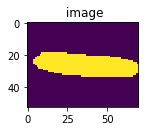

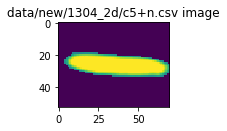

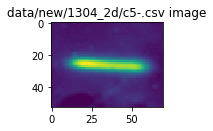

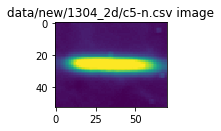

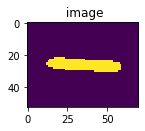

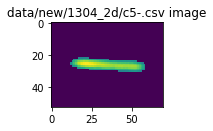

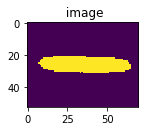

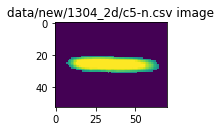

In [8]:
enrichment_analysis('data/new/1304_2d', 'c5', 'c5', threshold = 0.5, hard = True)

Magnitude (normalized): 0.7374376653502961
Magnitude (normalized): 0.6514890639734737
Enrichment of c4: 1.1319263915999085


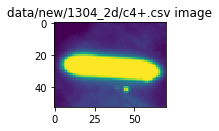

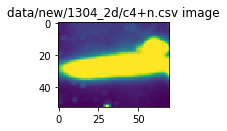

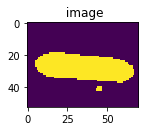

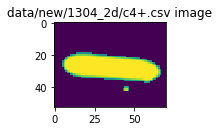

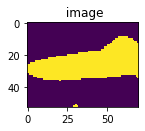

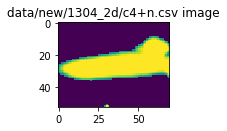

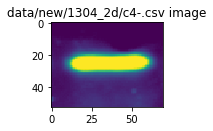

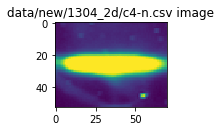

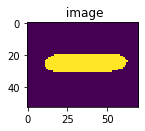

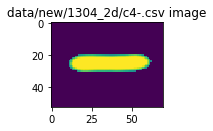

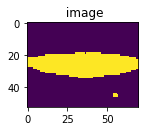

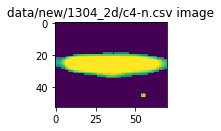

In [17]:
enrichment_analysis('data/new/1304_2d', 'c4', 'c4', threshold = 0.5, hard = True)

Magnitude (normalized): 1.3466486333469632
Magnitude (normalized): 0.6084199199110907
Enrichment of wt: 2.2133539505803013


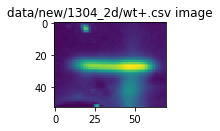

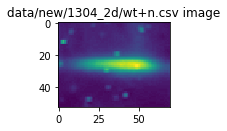

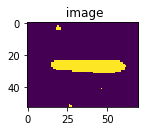

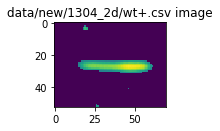

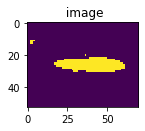

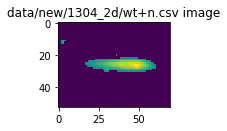

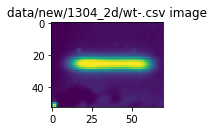

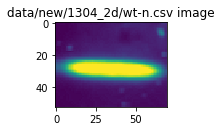

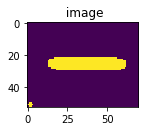

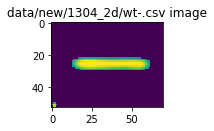

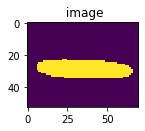

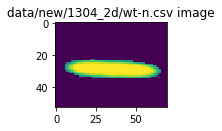

In [18]:
enrichment_analysis('data/new/1304_2d', 'wt', 'wt', threshold = 0.5, hard = True)

Magnitude (normalized): 0.5970845634753269
Magnitude (normalized): 0.42992346308945767
Enrichment of hp: 1.38881595152923


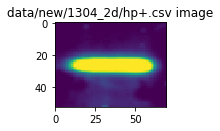

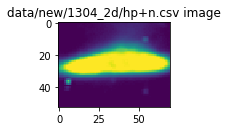

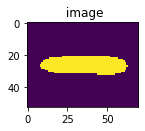

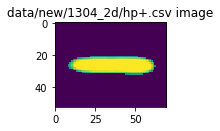

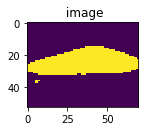

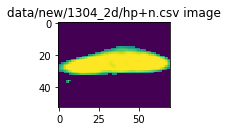

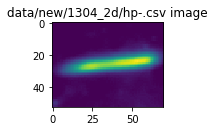

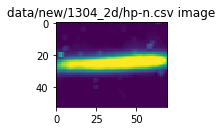

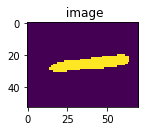

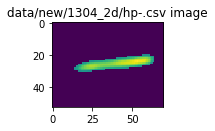

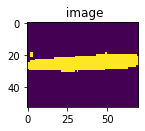

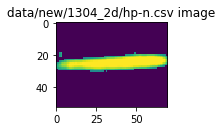

In [19]:
enrichment_analysis('data/new/1304_2d', 'hp', 'hp', threshold = 0.5, hard = True)